<a href="https://colab.research.google.com/github/snehahampapura/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#**Importing the necessary libraries and reading the file**

In [730]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [731]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [732]:
#Importing Dataset

# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/datasets/SeoulBikeData.csv",encoding='latin1')

#Importing dataset

df = pd.read_csv("/content/drive/MyDrive/Data/SeoulBikeData.csv",encoding='latin1')

Creating copy of dataset.

In [733]:
dataset = df.copy()

#**Data Exploration**

In [734]:
#First look of data
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [735]:
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [736]:
#Taking a look at statistics of the columns
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [737]:
#Familiarise with the columns in the dataset and their data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [738]:
# Finding Any Null Value Present in the data set
dataset.isnull().values.any()

False

There are No Null values / missing values.

In [739]:
# checking for duplicate
len(dataset[dataset.duplicated()])

0

There are no duplicated values as well.

In [740]:
dataset.shape

(8760, 14)

In [741]:
original_rows = dataset.shape[0]
original_rows

8760

This Dataset contains 8760 rows and 14 columns. Since we don't have any missing/ duplicate values will be retaining all the rows as of now.

We have 365 days in a year and 24 hours in a day. So, 365 * 24 = 8760.
<br>
So, we can say that we have data of each and every hour of period Dec 2017- Nov 2018.

In [742]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [743]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


##Feature Description.

* ### **Date** : Date is in the format of day/month/year. We have data from 2017 Dec to 2018 Nov i.e, 1 year of data.
* ### **Rented Bike count** - This is our dependent variable. And it gives the information about number of bikes rented per hour
* ### **Hour** - We have values from 0-23 (24 hour format) i.e, we have data for each and every hour.
* ### **Temperature** - Temperature is in Celsius and it gives the temperature reading for every hour
* ### **Humidity** - Humidity is the amount of water vapor in the air and ut is measured in % here.
* ### **Windspeed** - The speed of wind is measured in m/s
* ### **Visibility** - Visibility is a measure of the horizontal opacity of the atmosphere at the point of observation and is expressed in terms of the horizontal distance at which a person should be able to see and identify.
* ### **Dew point temperature** - It is the temperature to which air must be cooled to become saturated with water vapor, assuming constant air pressure and water content. And it is measured in celsius
* ### **Solar radiation** - It is an electromagnetic radiation emitted by the sun. And it is measured by MJ/m2.
* ### **Rainfall** - It is measured in mm. And it gives the rainfall reading for every hour.
* ### **Snowfall** - It is measured in cm. And it gives the snowfall reading for every hour. 
* ### **Seasons** - We have 4 different seasons in dataset. They are - Winter, Spring, Summer, Autumn.
* ### **Holiday** - Gives information about that particular day whether that day is holiday or not.
* ### **Functional Day** - Gives information about that particular day whether that day is fucntional day or non-functional day.

#**Exploratory Data Analysis**

##Data Preprocessing

Splitting up of "Date" column

For our analysis we are splitting the date column to months, days and years


In [744]:
#Column Date 
#Splitting up "Date" column into "year","month","day" columns
dataset['Date'] = dataset['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [745]:
# creating different columns for month, day and year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day_name()
dataset['year'] = dataset['Date'].dt.year

We are creating one more column to indicate that day in that year was a weekday or not

In [746]:
#creating weekday column from "day"
dataset['weekday']=dataset['day'].apply(lambda x : 0 if x=='Saturday' or x=='Sunday' else 1 )

We have splitted up "Date" column into day,month and year. So, "Date" column is no longer needed. Since we have created "weekday" column out of "day" column. So "day" column is also no longer needed. Let's drop both of these columns.

In [747]:
dataset=dataset.drop(columns=['Date','day'],axis=1)

This dataset contains data from 2017 Dec to 2018 Nov. i.e, 1 year of data. So, we don't need "year" column aswell. Let's drop it.

In [748]:
dataset.drop(columns=['year'],axis=1,inplace=True)

In [749]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

"Hour","month","weekday" - datatype of these columns are shown has int, but actually these are categorical data. So, let's convert the datatype.

In [750]:
#Changing datatype
#Change the int64 column into category/object column
cols=['Hour','month','weekday']
for col in cols:
  dataset[col]=dataset[col].astype('object')

In [751]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   objec

In [752]:
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1


##Analysis of Dependent variable.

First Let's look into our dependent variable i.e, Rented Bike count.


Rented Bike count gives us the information of number of bikes rented per hour

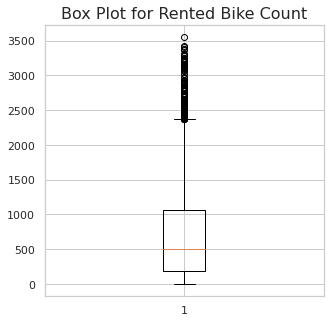

In [753]:
plt.figure(figsize=(5,5))
plt.title("Box Plot for Rented Bike Count",fontsize=16)
plt.boxplot(dataset['Rented Bike Count'])
plt.show()

In [754]:
#Considering the value above 3500 as an outlier, lets drop it.
dataset.drop(dataset[dataset['Rented Bike Count']>3500].index,axis=0,inplace=True)

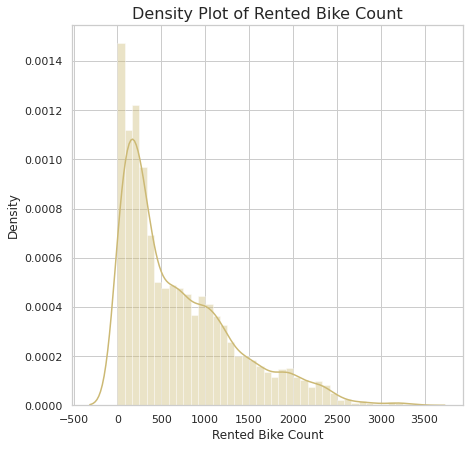

In [755]:
plt.figure(figsize=(7,7))
plt.title("Density Plot of Rented Bike Count",fontsize=16)
sns.distplot(dataset['Rented Bike Count'],color="y")
plt.show()

Through density plot we got know that it is right skewed, so to remove skewness we will be applying square root.

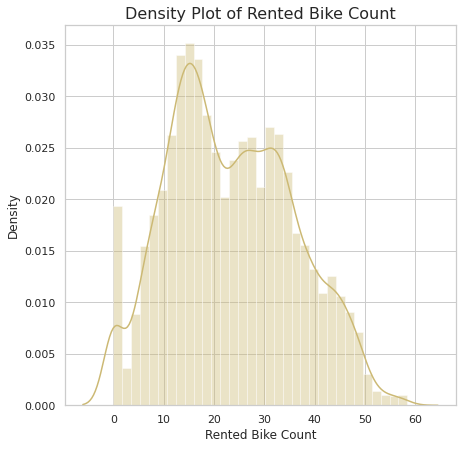

In [756]:

plt.figure(figsize=(7,7))
plt.title("Density Plot of Rented Bike Count",fontsize=16)
sns.distplot(np.sqrt(dataset['Rented Bike Count']),color="y")
plt.show()

After applying square root to rental bike count distribution, we can able to see the distribution which is almost normal.

##Analysis of Independent variables.

In [757]:
column = dataset.columns
column

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekday'],
      dtype='object')

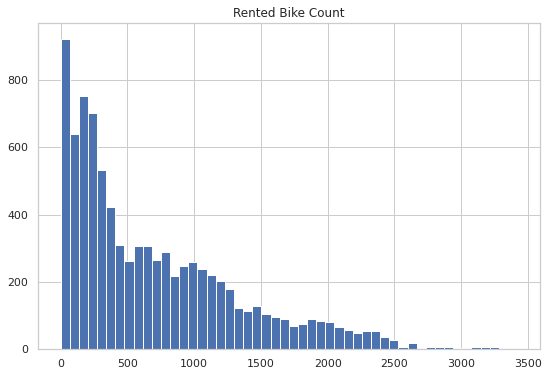

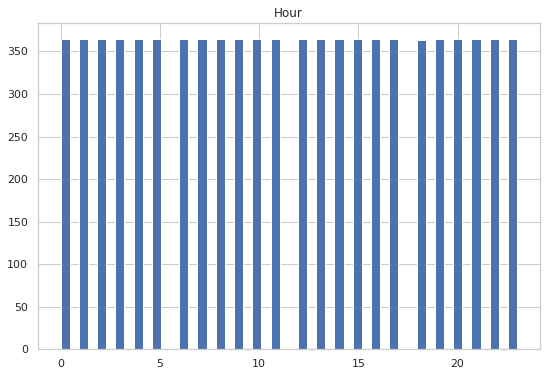

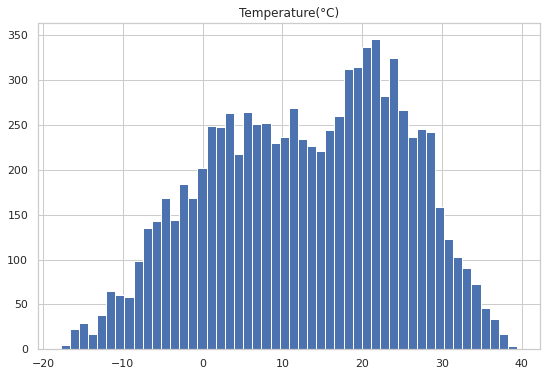

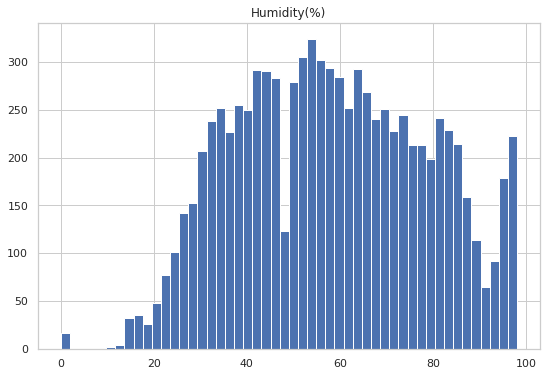

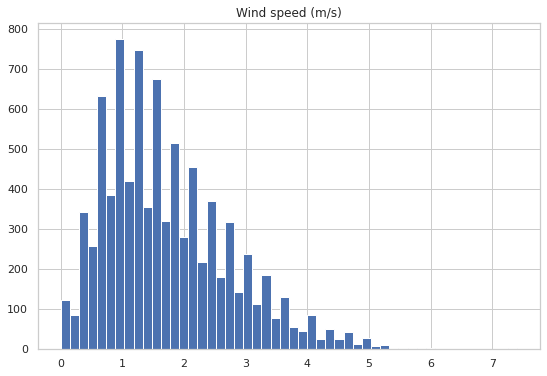

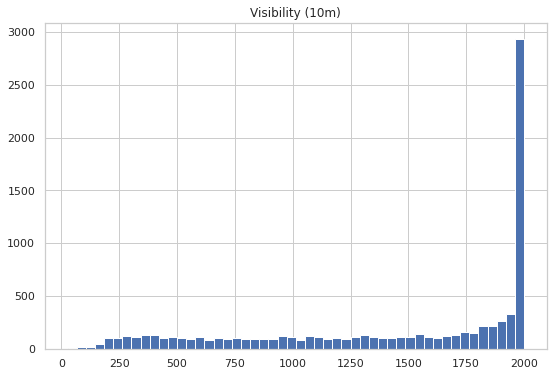

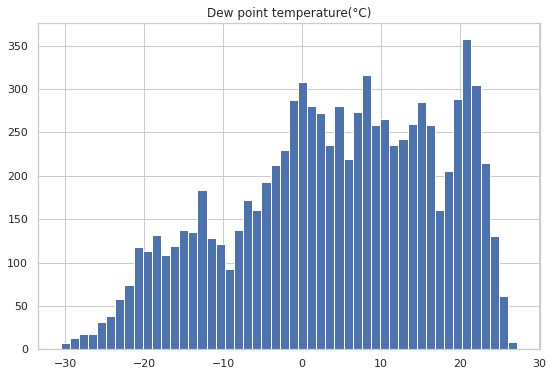

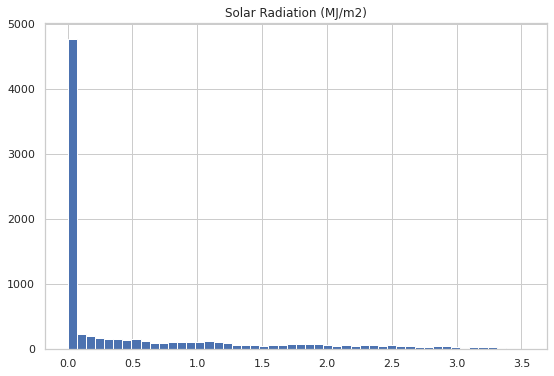

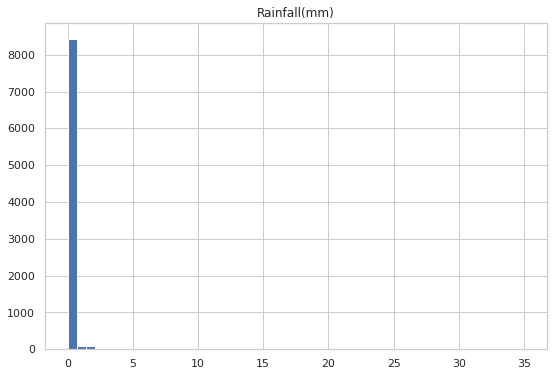

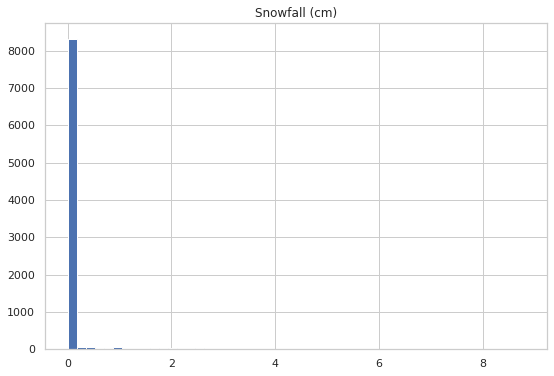

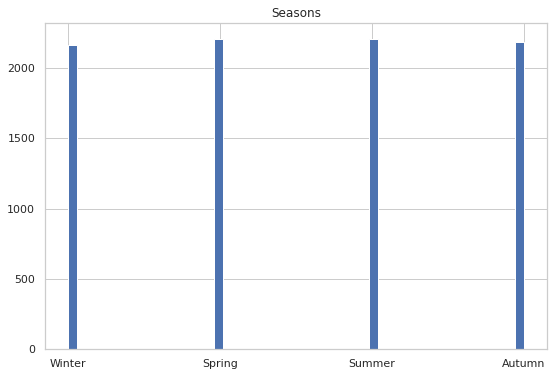

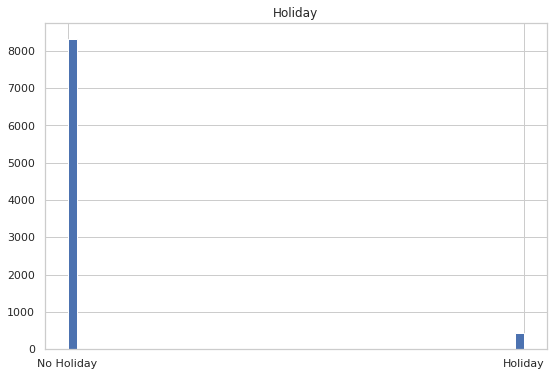

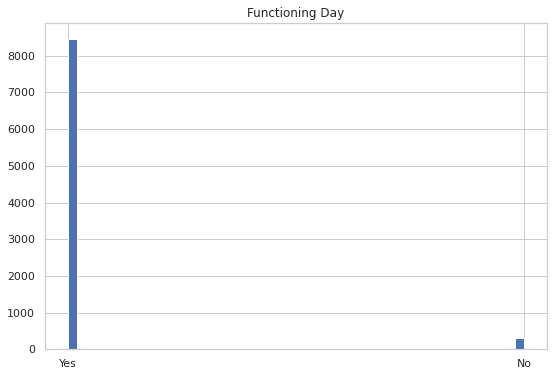

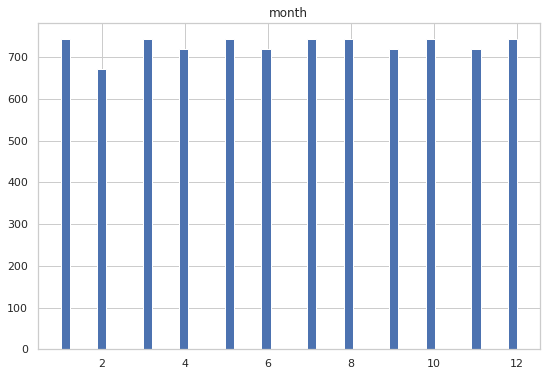

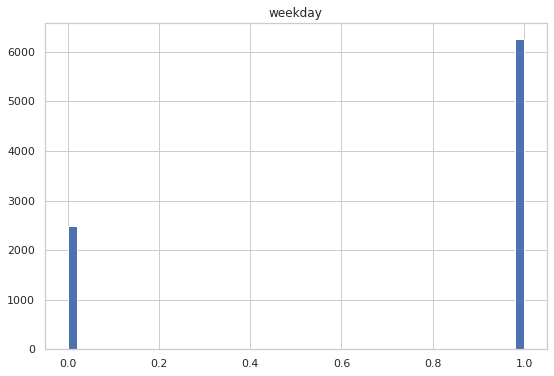

In [758]:
for col in column:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax) 
    ax.set_title(col)
plt.show()

From the above chart we can observe that 'Rented Bike Count', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm) have continuous values. Hence we will consider them as Numerical variable.
<br>
'Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'weekday' have discrete values. Hence we will consider them as Categorical variable.

###Analysis of Numerical variables

In [759]:
dataset.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

####**Temperature**

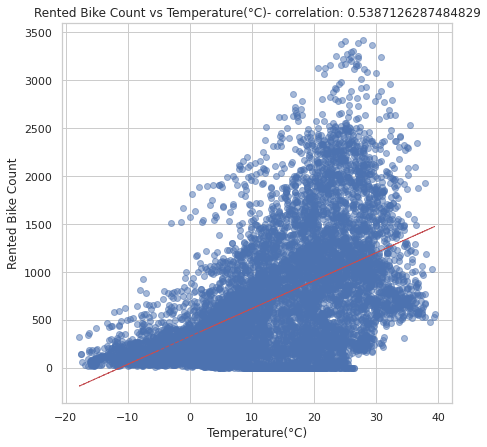

In [760]:

fig = plt.figure(figsize=(7, 7))
ax = fig.gca()
feature = dataset['Temperature(°C)']
label = dataset['Rented Bike Count']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label,alpha=0.5)
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
ax.set_title('Rented Bike Count vs ' + 'Temperature(°C)' + '- correlation: ' + str(correlation))
z = np.polyfit(dataset['Temperature(°C)'], dataset['Rented Bike Count'], 1)
y_hat = np.poly1d(z)(dataset['Temperature(°C)'])

plt.plot(dataset['Temperature(°C)'], y_hat, "r--", lw=1)

plt.show()

We can see there is a positive correlation between rented bike count and temperature.

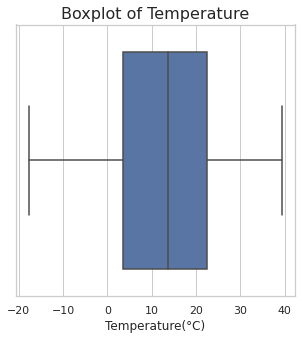

In [761]:
plt.figure(figsize=(5,5))
sns.boxplot(dataset['Temperature(°C)'])
plt.title("Boxplot of Temperature", fontsize=16)
plt.show()

There are no outliers.

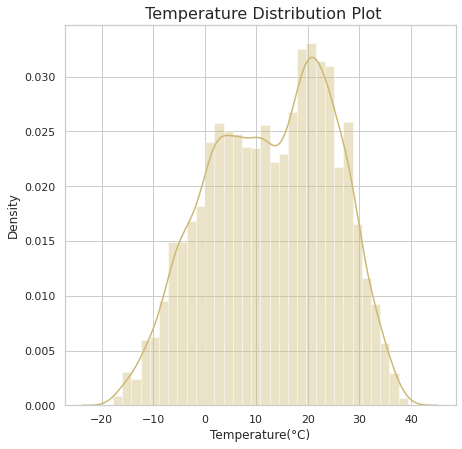

In [762]:
plt.figure(figsize=(7,7))
sns.distplot(dataset['Temperature(°C)'],color="y")
plt.title(" Temperature Distribution Plot", fontsize=16)
plt.xlabel('Temperature(°C)')
plt.show()

And the distribution is almost normal.

In [763]:
dataset['Temp'] = dataset['Temperature(°C)'].apply(np.floor)

In [764]:
dataset.groupby('Temp')['Rented Bike Count'].mean().head()

Temp
-18.0    169.250000
-17.0    151.111111
-16.0     84.129032
-15.0     98.631579
-14.0    150.555556
Name: Rented Bike Count, dtype: float64

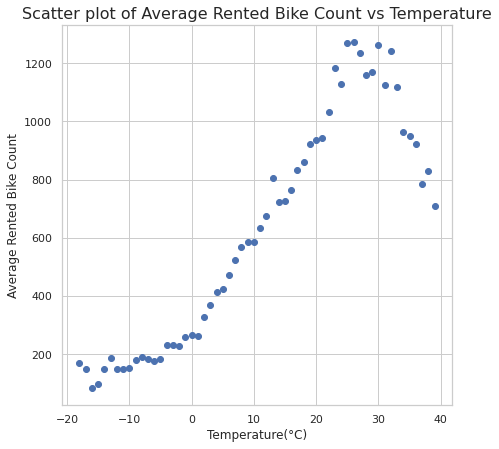

In [765]:
temperature_bikecount=pd.DataFrame(dict(dataset.groupby('Temp')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()
temperature_bikecount.rename(columns={'index':'Temperature'},inplace=True)
plt.figure(figsize=(7,7))
plt.scatter(temperature_bikecount['Temperature'],temperature_bikecount['Average Bike Count'])
plt.title("Scatter plot of Average Rented Bike Count vs Temperature", fontsize=16)
plt.xlabel('Temperature(°C)')
plt.ylabel('Average Rented Bike Count')
plt.show()

We can observe that people like to ride bikes mostly during warm temperature. i.e, around 25 degree celsius.

####**Dew point temperature**


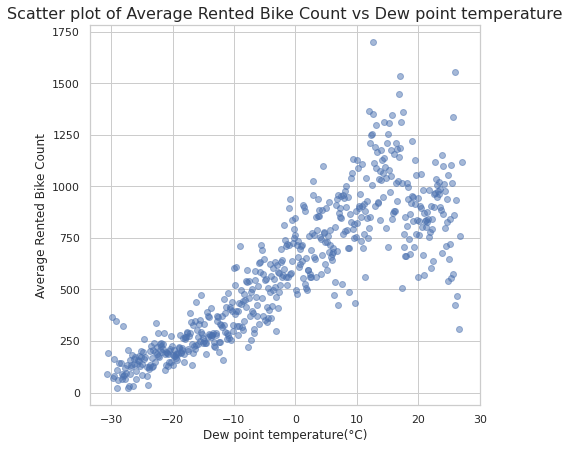

In [766]:
dew_temperature_bikecount=pd.DataFrame(dict(dataset.groupby('Dew point temperature(°C)')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()
dew_temperature_bikecount.rename(columns={'index':'Dew point temperature(°C)'},inplace=True)

plt.figure(figsize=(7,7))
plt.scatter(dew_temperature_bikecount['Dew point temperature(°C)'],dew_temperature_bikecount['Average Bike Count'],alpha=0.5)
plt.title("Scatter plot of Average Rented Bike Count vs Dew point temperature", fontsize=16)
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Average Rented Bike Count')
plt.show()

We can observe that Dew point temperature almost follows Temperature, lets go ahead and plot a graph for Dew point temperature and Temperature to verify.

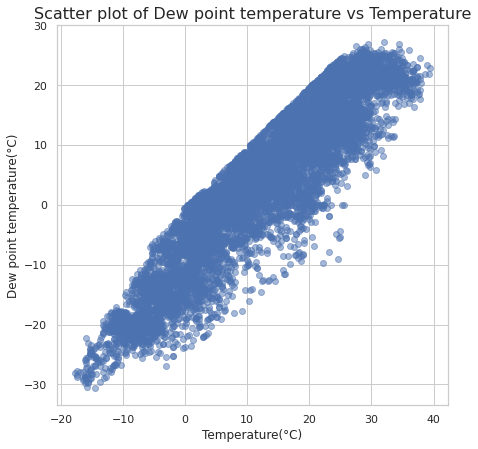

In [767]:
plt.figure(figsize=(7,7))
plt.scatter(dataset['Temperature(°C)'],dataset['Dew point temperature(°C)'],alpha=0.5)
plt.title("Scatter plot of Dew point temperature vs Temperature", fontsize=16)
plt.ylabel('Dew point temperature(°C)')
plt.xlabel('Temperature(°C)')
plt.show()

We can see there is a linear relation between Temperature and Dew point temperature, since there is a huge correlation, we will keep either of them after analyzing the correlation of each of them with Rented bike count.

####**Humidity**

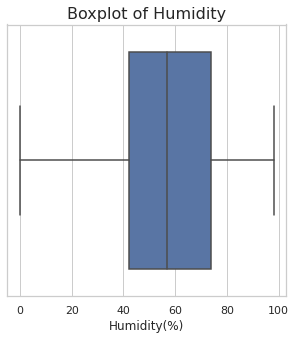

In [768]:
plt.figure(figsize=(5,5))
sns.boxplot(dataset['Humidity(%)'])
plt.title("Boxplot of Humidity",fontsize=16)
plt.show()

There are no outliers.

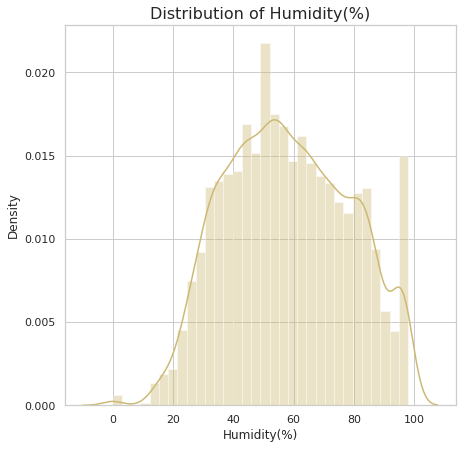

In [769]:
plt.figure(figsize=(7,7))
sns.distplot(dataset['Humidity(%)'], color ='y')
plt.title("Distribution of Humidity(%)",fontsize=16)
plt.show()

The distribution is also almost normal.

In [770]:
humidity_bikecount=pd.DataFrame(dict(dataset.groupby('Humidity(%)')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()

In [771]:
humidity_bikecount.rename(columns={'index':'Humidity'},inplace=True)

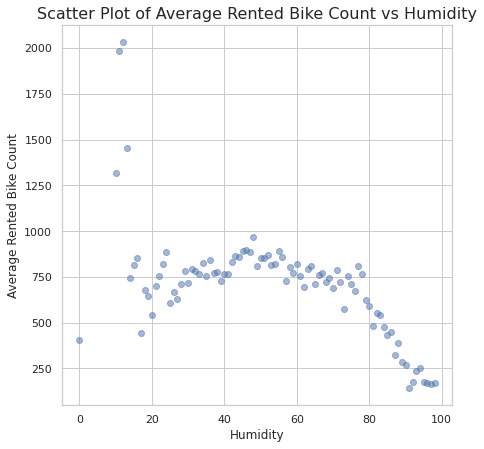

In [772]:
plt.figure(figsize=(7,7))
plt.scatter(humidity_bikecount['Humidity'],humidity_bikecount['Average Bike Count'],alpha=0.5)
plt.title("Scatter Plot of Average Rented Bike Count vs Humidity",fontsize=16)
plt.xlabel("Humidity")
plt.ylabel("Average Rented Bike Count")
plt.show()

We can observe that as the humidity rises above 70%, there is a steep decrease in the bike demand.

####**Wind Speed**

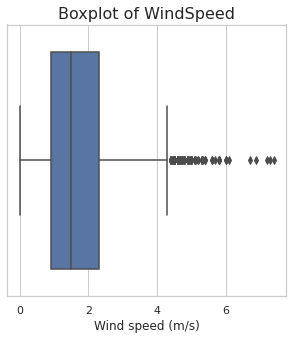

In [773]:
plt.figure(figsize=(5,5))
sns.boxplot(dataset['Wind speed (m/s)'])
plt.title("Boxplot of WindSpeed",fontsize=16)
plt.show()

In [774]:
#Considering the value above 6 as an outlier, Lets drop them.
dataset.drop(dataset[dataset['Wind speed (m/s)']>6].index,axis=0,inplace=True)

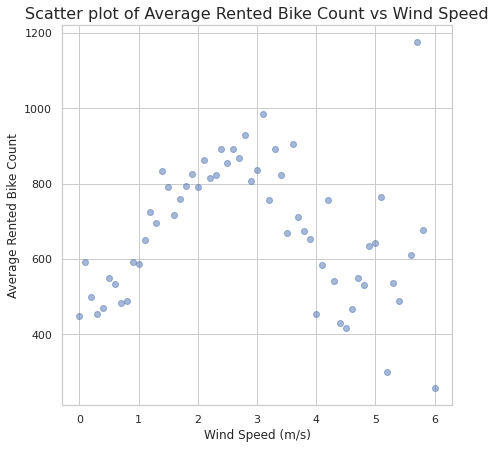

In [775]:
windspeed_bikecount=pd.DataFrame(dict(dataset.groupby('Wind speed (m/s)')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()
windspeed_bikecount.rename(columns={'index':'Wind speed (m/s)'},inplace=True)

plt.figure(figsize=(7,7))
plt.scatter(windspeed_bikecount['Wind speed (m/s)'],windspeed_bikecount['Average Bike Count'],alpha=0.5)
plt.title("Scatter plot of Average Rented Bike Count vs Wind Speed",fontsize=16)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Average Rented Bike Count")
plt.show()

We can see there is a sinusoidal relation between Rented Bike Count and Wind speed.

####**Visibility**

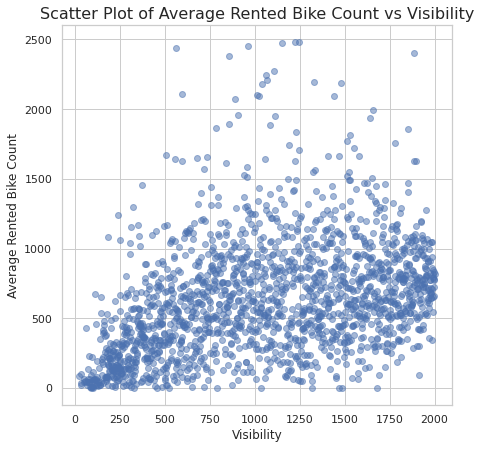

In [776]:
visibility_bikecount=pd.DataFrame(dict(dataset.groupby('Visibility (10m)')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()
visibility_bikecount.rename(columns={'index':'Visibility (10m)'},inplace=True)

plt.figure(figsize=(7,7))
plt.scatter(visibility_bikecount['Visibility (10m)'],visibility_bikecount['Average Bike Count'],alpha=0.5)
plt.title("Scatter Plot of Average Rented Bike Count vs Visibility",fontsize=16)
plt.xlabel("Visibility")
plt.ylabel('Average Rented Bike Count')
plt.show()

We cannot observe any prominent relation between Visibility and the dependent variable Rented Bike Count

So, lets Drop this feature.

In [777]:
dataset.drop('Visibility (10m)',axis=1,inplace=True)

####**Solar Radiation**

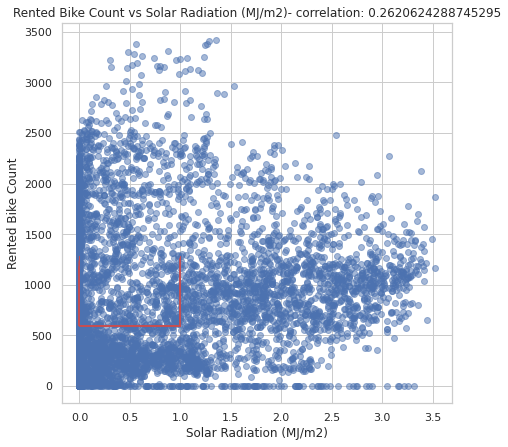

In [778]:
fig = plt.figure(figsize=(7, 7))
ax = fig.gca()
feature = dataset['Solar Radiation (MJ/m2)']
label = dataset['Rented Bike Count']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label,alpha=0.5)
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')
ax.set_title('Rented Bike Count vs ' + 'Solar Radiation (MJ/m2)' + '- correlation: ' + str(correlation) )
z = np.polyfit(dataset['Solar Radiation (MJ/m2)'], dataset['Rented Bike Count'], 1)
y_hat = np.poly1d(z)(dataset['Solar Radiation (MJ/m2)'])

plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

We can observe positive correlation with rented bike count.

####**Rainfall and Snowfall**

In [779]:
(dataset['Snowfall (cm)'].value_counts().head())/len(dataset)*100

0.0    94.950303
0.3     0.479835
1.0     0.434137
0.9     0.388438
0.5     0.388438
Name: Snowfall (cm), dtype: float64

In [780]:
(dataset['Rainfall(mm)'].value_counts().head())/len(dataset)*100

0.0    94.002056
0.5     1.313835
1.0     0.754027
1.5     0.639781
0.1     0.525534
Name: Rainfall(mm), dtype: float64

Since most of the entries are 0(more than 90%), these columns will not add anything for our analysis.

So, lets drop these 2 columns.

In [781]:
dataset.drop('Snowfall (cm)',axis=1,inplace=True)
dataset.drop('Rainfall(mm)',axis=1,inplace=True)

Since "Temp" is created temporarily for EDA of temperature. Let's drop that column aswell.

In [782]:
dataset.drop('Temp',axis=1,inplace=True)

####**Correlation analysis between variables**

In [783]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)'],
      dtype='object')

In [784]:
nf = list(numeric_features)

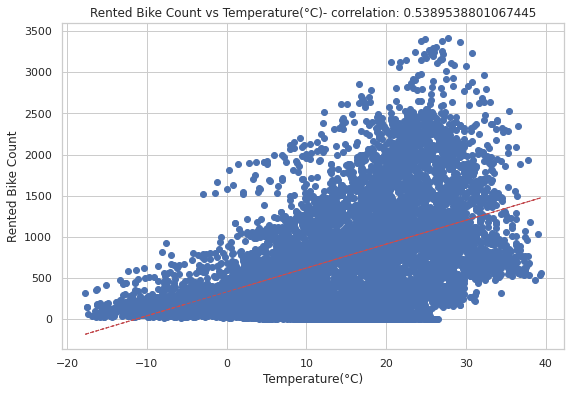

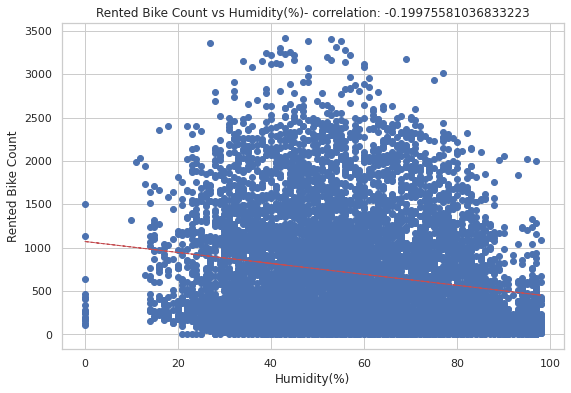

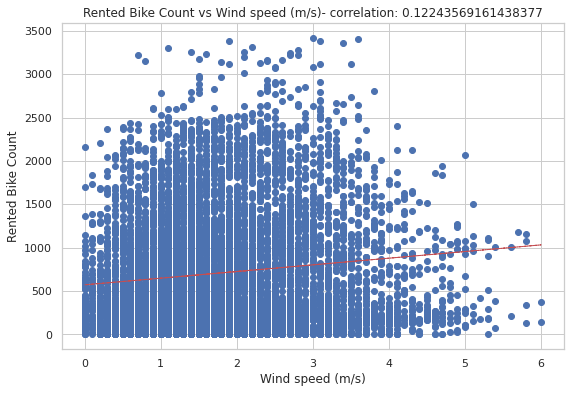

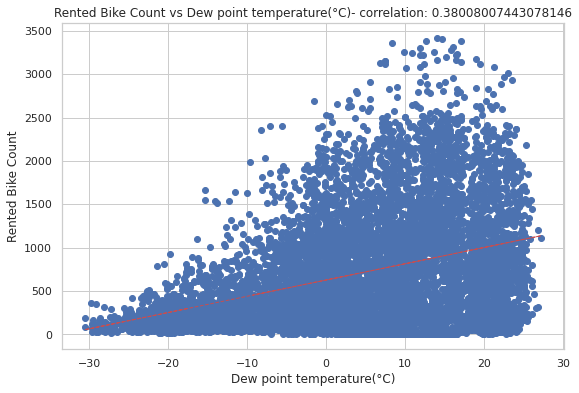

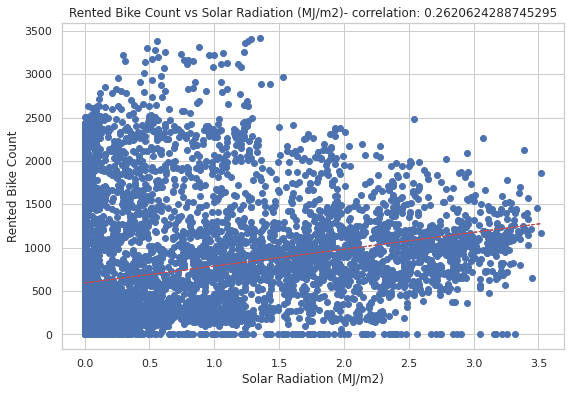

In [785]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()


From the above plots we can observe that - 




*  "Temperature","Wind speed","Dew point temperature","Solar radiation" are
positively correlated means when they increase rented bike count also increases. 
*   "Humidity" is negatively correlated means when humidity increase rented bike count decreases.



Now Let's plot heat map to see for correlation.

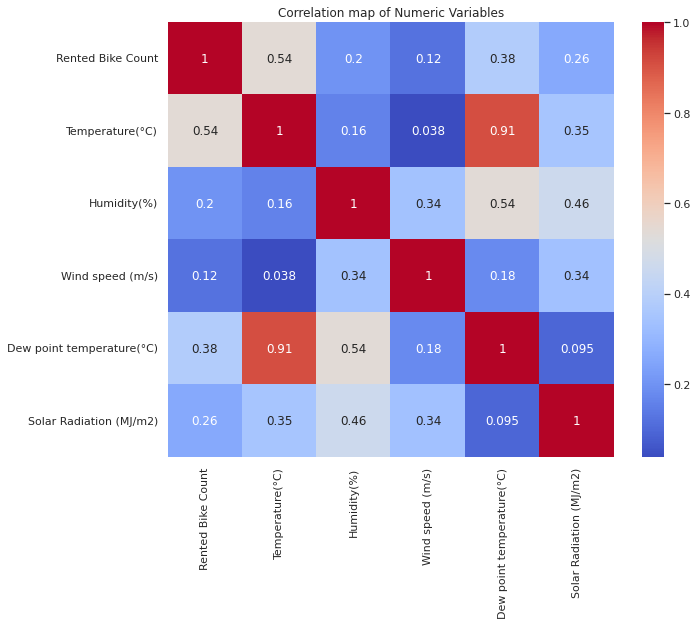

In [786]:
 ## Correlation
plt.figure(figsize=(10,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.title("Correlation map of Numeric Variables")
plt.show()

Now let's calculate VIF to check for multicollinearity between independent features. And remove them.

In [787]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [788]:
vif_df = calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])
vif_df

,variables,VIF
0,Temperature(°C),2.931704
1,Humidity(%),3.725650
2,Wind speed (m/s),3.295113
3,Solar Radiation (MJ/m2),2.208808


The variables we are left with are having VIF less than 5. So, we can say that these are not correlated with each other. 

After all the analysis we are left with these numerical variables.

In [789]:
num_feat = list(vif_df['variables'])
num_feat

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)']

###Analysis of Categorical variables

In [790]:
dataset.describe(include='object').columns

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'weekday'], dtype='object')

####**Hour**


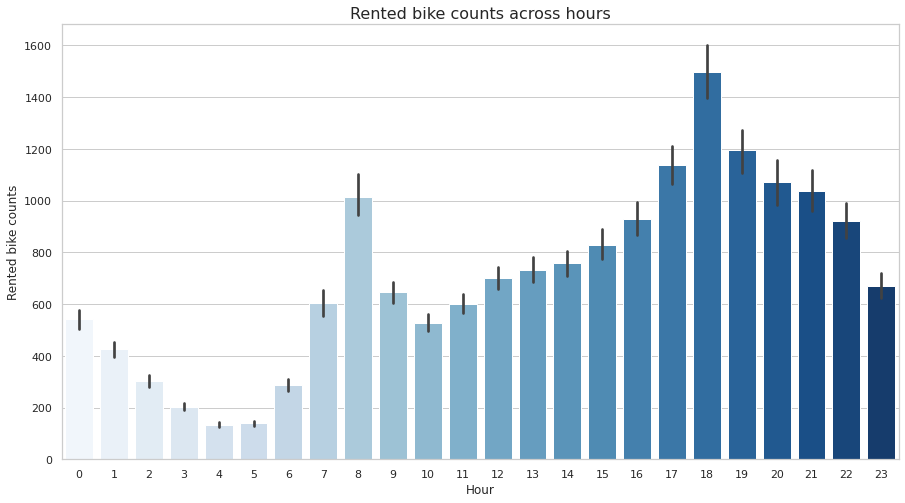

In [791]:
sns.set(style='whitegrid') # adding gridlines in the graphs (white, dark, whitegrid, darkgrid, ticks)
plt.figure(figsize=(15, 8))
plt.title("Rented bike counts across hours", fontsize=16)
ax=sns.barplot(x = dataset['Hour'],y = dataset['Rented Bike Count'],palette="Blues")
plt.xlabel("Hour")
plt.ylabel("Rented bike counts")
plt.show()


We can observe that during Peak hours usuage of rental bikes is more.

####**Month**


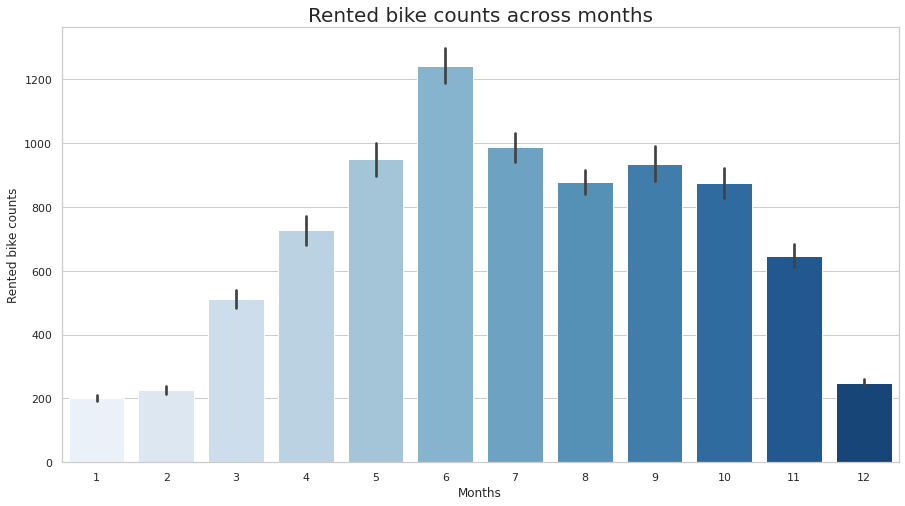

In [792]:
sns.set(style='whitegrid') # adding gridlines in the graphs (white, dark, whitegrid, darkgrid, ticks)
plt.figure(figsize=(15, 8))
plt.title("Rented bike counts across months", fontsize=20)
ax=sns.barplot(x = dataset['month'],y = dataset['Rented Bike Count'],palette="Blues")
plt.xlabel("Months")
plt.ylabel("Rented bike counts")

plt.show()


As we can see the winter season(Dec-Feb) are the dull months for rental bike industry as the temperature falls lower degrees and people tend to stay indoors.

####**Weekday**

In [793]:
dataset['weekday'].value_counts()

1    6257
0    2496
Name: weekday, dtype: int64

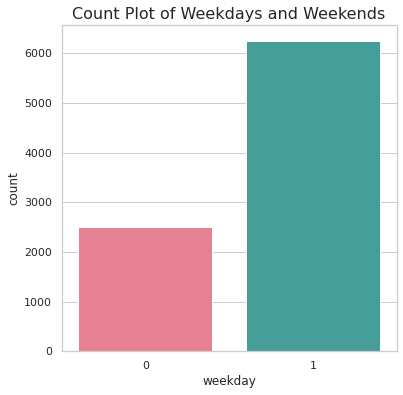

In [794]:
# plotting a bar plot
plt.figure(figsize=(6,6))
sns.countplot(dataset['weekday'], palette='husl')
plt.title("Count Plot of Weekdays and Weekends", fontsize=16)
plt.show()

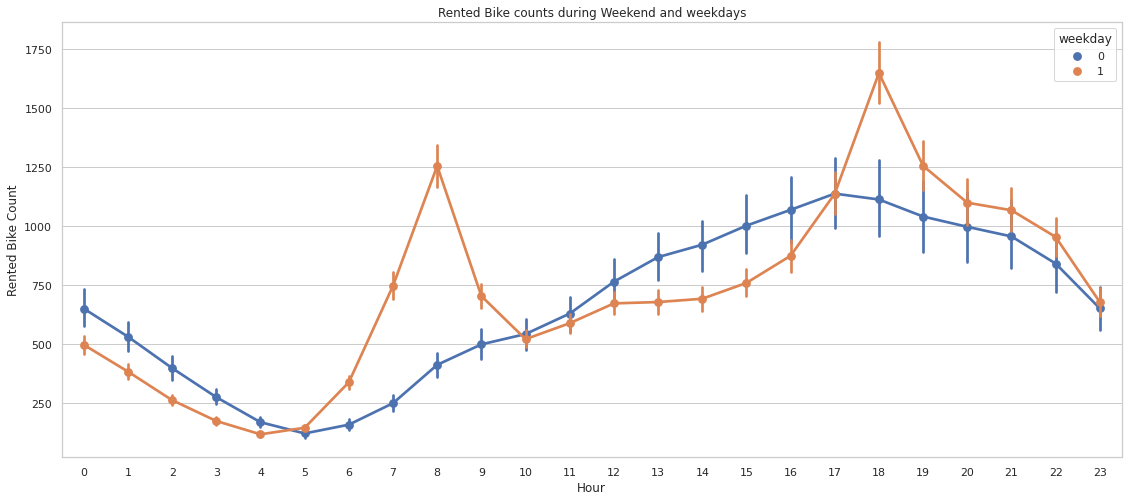

In [795]:
fig,ax=plt.subplots(figsize=(19,8))
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue='weekday',ax=ax)
ax.set(title='Rented Bike counts during Weekend and weekdays')
plt.show()

From the above plot we can observe that -
In weekdays, rental bike counts will be more during Peak hours.
<br>
And in weekends, rental bike counts will keep on raising during evening times.

####**Seasons**

In [796]:
dataset['Seasons'].value_counts()

Summer    2206
Spring    2204
Autumn    2184
Winter    2159
Name: Seasons, dtype: int64

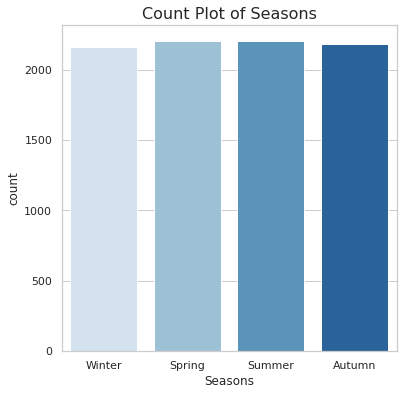

In [797]:
# plotting a bar plot
plt.figure(figsize=(6,6))
sns.countplot(dataset['Seasons'], palette='Blues')
plt.title("Count Plot of Seasons", fontsize=16)
plt.show()

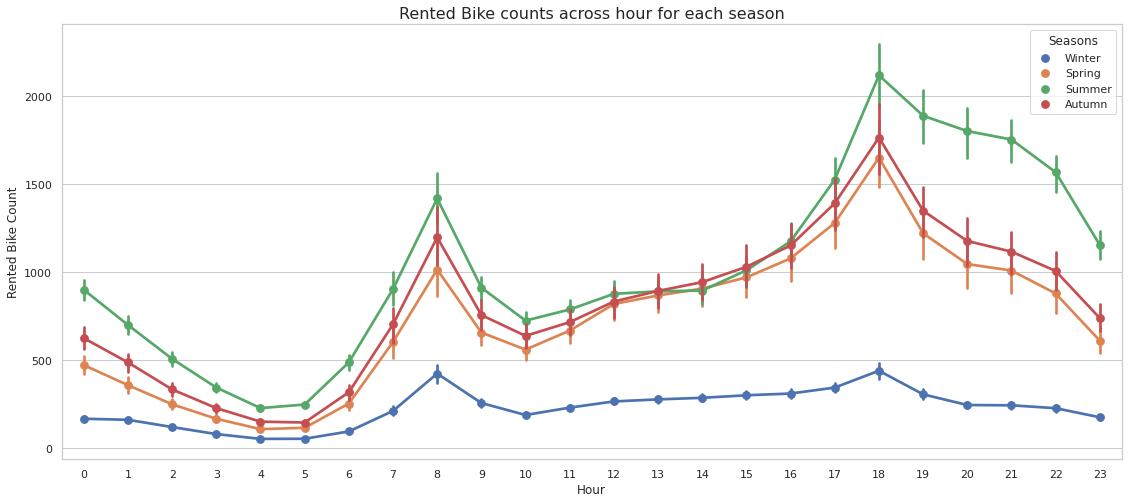

In [798]:
fig,ax=plt.subplots(figsize=(19,8))
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)

plt.title('Rented Bike counts across hour for each season', fontsize=16)
plt.show()

From the above chart we can observe that people like to ride bikes more in summer and in winter people usually like to stay indoor. This is what we even observed from "months" column.

####**Holiday**

In [799]:
dataset['Holiday'].value_counts()

No Holiday    8321
Holiday        432
Name: Holiday, dtype: int64

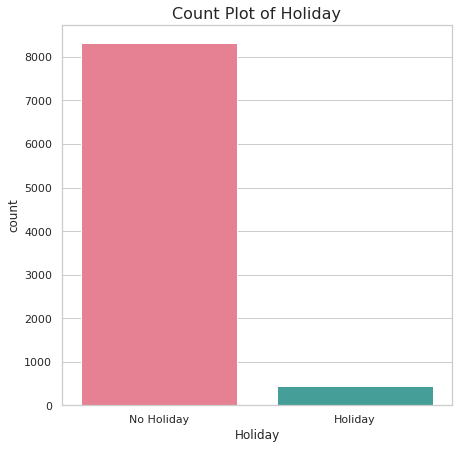

In [800]:
# plotting a bar plot
plt.figure(figsize=(7,7))
sns.countplot(dataset['Holiday'], palette='husl')
plt.title('Count Plot of Holiday', fontsize=16)
plt.show()

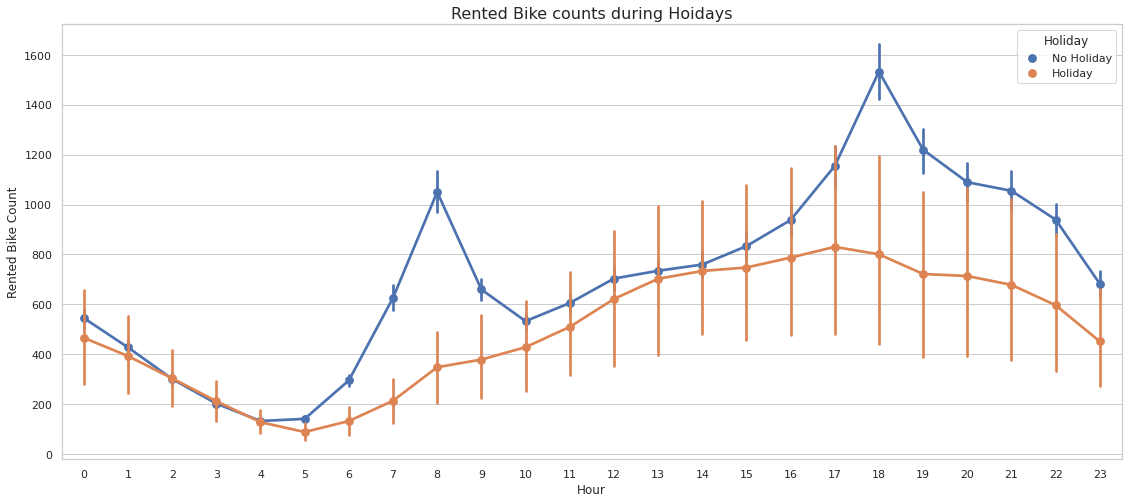

In [801]:
fig,ax=plt.subplots(figsize=(19,8))
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
plt.title('Rented Bike counts during Hoidays', fontsize=16)
plt.show()

The amount of people using rental bikes will be less during holidays.

####**Functioning day**

In [802]:
dataset['Functioning Day'].value_counts()

Yes    8458
No      295
Name: Functioning Day, dtype: int64

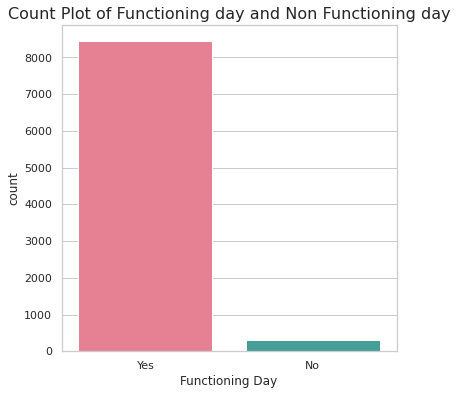

In [803]:
# plotting a bar plot
plt.figure(figsize=(6,6))
sns.countplot(dataset['Functioning Day'], palette='husl')
plt.title("Count Plot of Functioning day and Non Functioning day", fontsize=16)
plt.show()

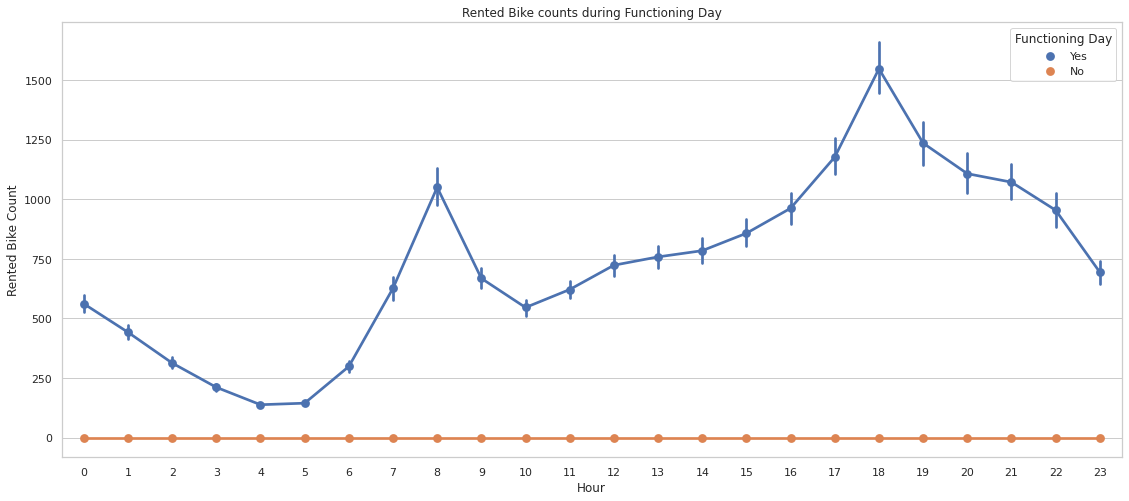

In [804]:
fig,ax=plt.subplots(figsize=(19,8))
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Rented Bike counts during Functioning Day')
plt.show()

From the above chart it is very clear that people don't use rental bikes during Non-functional day.

####**Encoding of categorical variables**

In [805]:
categorical_features = dataset.describe(include=['object']).columns
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'weekday'], dtype='object')

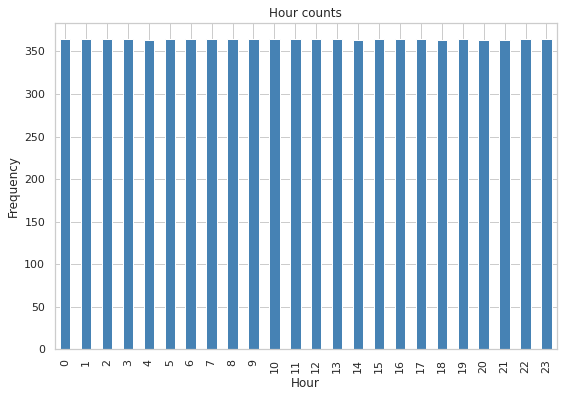

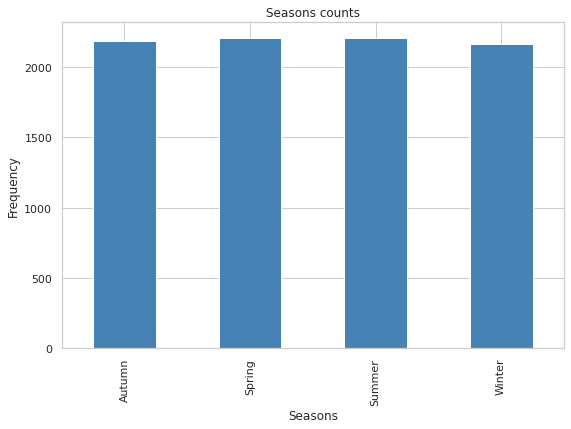

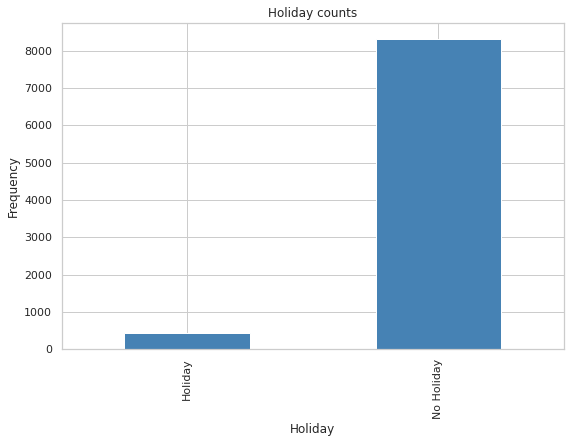

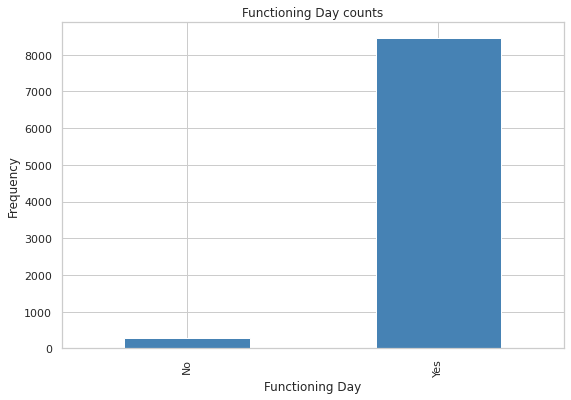

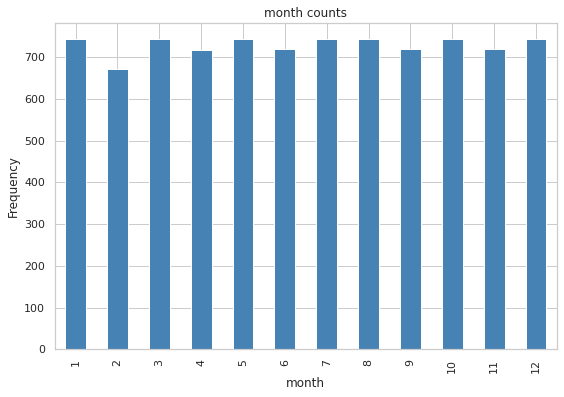

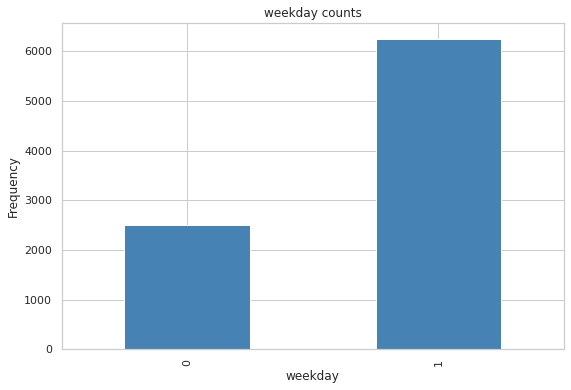

In [806]:
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

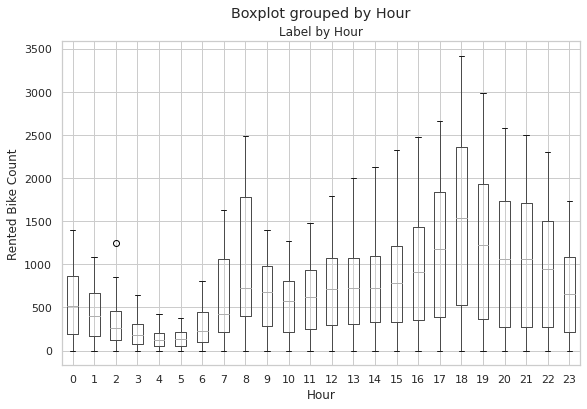

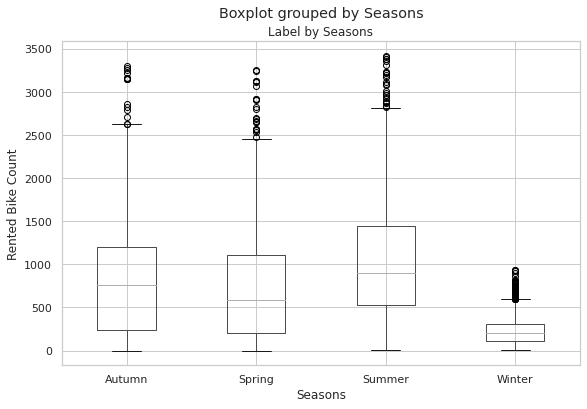

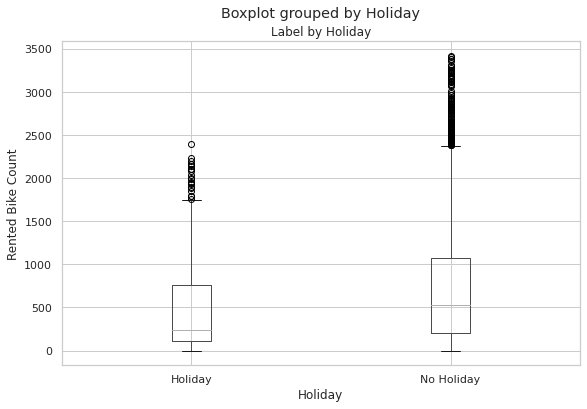

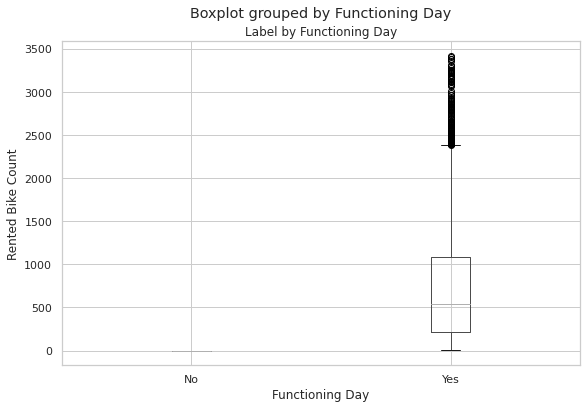

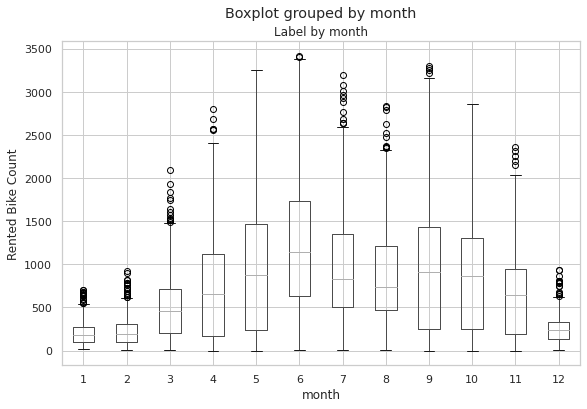

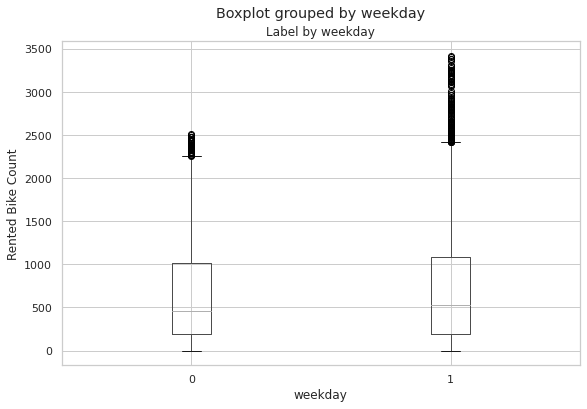

In [807]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

After analyzing count and box plots, Lets encode our categorical variables.

In [808]:
encoders_nums = {"month":{12:0,1:0,2:0,3:0,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:1},
                 "Holiday":{"No Holiday":1,"Holiday":0},"Functioning Day":{"Yes":1,"No":0}}

In [809]:
dataset = dataset.replace(encoders_nums)
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Dew point temperature(°C),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day,month,weekday
0,254,0,-5.2,37,2.2,-17.6,0.0,Winter,1,1,0,1
1,204,1,-5.5,38,0.8,-17.6,0.0,Winter,1,1,0,1
2,173,2,-6.0,39,1.0,-17.7,0.0,Winter,1,1,0,1
3,107,3,-6.2,40,0.9,-17.6,0.0,Winter,1,1,0,1
4,78,4,-6.0,36,2.3,-18.6,0.0,Winter,1,1,0,1


Now lets do One-Hot encoding for "Season" and "Hour" features,

In [810]:
dataset = pd.get_dummies(dataset, columns=["Seasons",'Hour'], prefix=["season",'hour'])

In [811]:
dataset.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Dew point temperature(°C),Solar Radiation (MJ/m2),Holiday,Functioning Day,month,weekday,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,254,-5.2,37,2.2,-17.6,0.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,-17.6,0.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,-17.7,0.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,-17.6,0.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,-18.6,0.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [812]:
original_rows

8760

In [813]:
new_rows = dataset.shape[0]
new_rows

8753

In [814]:
print(round((new_rows/original_rows)*100,2),"% of data is retained after cleaning and analysis")

99.92 % of data is retained after cleaning and analysis


In [815]:
features = list(dataset.columns)
features.remove('Rented Bike Count')
features.remove('Dew point temperature(°C)')

In [816]:
features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Holiday',
 'Functioning Day',
 'month',
 'weekday',
 'season_Autumn',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23']

In [817]:
len(features)

36

#**Training Model and Evaluation**

In [818]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8753 entries, 0 to 8759
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8753 non-null   int64  
 1   Temperature(°C)            8753 non-null   float64
 2   Humidity(%)                8753 non-null   int64  
 3   Wind speed (m/s)           8753 non-null   float64
 4   Dew point temperature(°C)  8753 non-null   float64
 5   Solar Radiation (MJ/m2)    8753 non-null   float64
 6   Holiday                    8753 non-null   int64  
 7   Functioning Day            8753 non-null   int64  
 8   month                      8753 non-null   int64  
 9   weekday                    8753 non-null   object 
 10  season_Autumn              8753 non-null   uint8  
 11  season_Spring              8753 non-null   uint8  
 12  season_Summer              8753 non-null   uint8  
 13  season_Winter              8753 non-null   uint8

In [819]:
#Since datatype of "weekday" is object it will cause error during Standardization, so changing its datatype.

cols=['weekday']
for col in cols:
  dataset[col]=dataset[col].astype('int64')

The range scales of all the features will be different, so we need to rescale them to get more reliable predictions. Lets apply Standardization.

In [820]:
from scipy.stats import zscore
X = dataset[features].apply(zscore)

As we observed earlier in Dependent variable analysis, the distribution of data is Rightly-skewed. So, Lets apply square root function to convert Rightly-Skewed distribution to Normal distribution.

In [821]:
y = np.sqrt(dataset['Rented Bike Count'])

Let's split our data into Train dataset and Test dataset.

At first before applying any model, we need to split our dataset into Training dataset and Testing dataset. We will train our model using Training dataset and we will evaluate how our model got trained for unseen data i.e, test dataset.

Here we are splitting up dataset in 80:20 ratio. i.e, 80% of data will be used for training and 20% of data will be used has test data.

In [822]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7002, 36)
(1751, 36)


Lets define few of our evaluation metrics before training models.


*   **MSE** - The Mean Squared Error measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss. Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function.

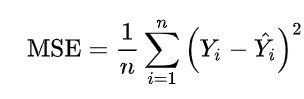






*   **RMSE** - RMSE is the square root of MSE. MSE is measured in units that are the square of the target variable, while RMSE is measured in the same units as the target variable. Due to its formulation, MSE, just like the squared loss function that it derives from, effectively penalizes larger errors more severely.

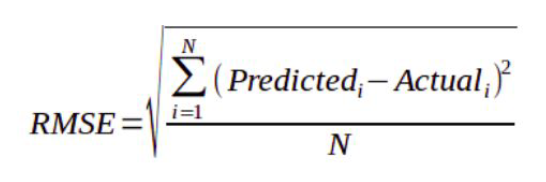






*   **R2 (R - Squared)** - R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.

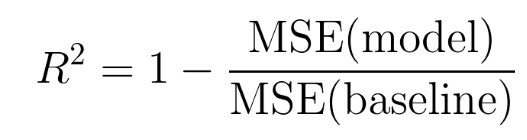





*   **Adjusted R2** - Adjusted R² depicts the same meaning as R² but is an improvement of it. R² suffers from the problem that the scores improve on increasing terms even though the model is not improving which may misguide the researcher.
Adjusted R² is always lower than R² as it adjusts for the increasing predictors and only shows improvement if there is a real improvement.
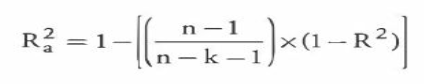




In [823]:
evaluation_df_train=pd.DataFrame()
evaluation_df = pd.DataFrame()

Let's define a function to return MSE ,RMSE ,R2 and Adjusted R2 for both train and test data.

In [824]:
def eval_model(y_train,y_pred_train,y_test,y_pred,model):
  evaluation_df_train=pd.DataFrame()
  evaluation_df = pd.DataFrame()
  print("Train :- ")
  MSE_train  = mean_squared_error((y_train)**2, (y_pred_train)**2)
  print("MSE :" , MSE_train)

  RMSE_train = np.sqrt(MSE_train)
  print("RMSE :" ,RMSE_train)
  print("")
  print("Test :- ")
  MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  print("")
  print("************************************************")
  print("")

  print("Train :- ")
  r2_train = r2_score((y_train)**2, (y_pred_train)**2)
  adjusted_r2_train = 1-(1-r2_score((y_train)**2, (y_pred_train)**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
  print("R2 :" ,r2_train)
  print("Adjusted R2 : ",adjusted_r2_train)
  print("")
  print("Test :- ")
  r2 = r2_score((y_test)**2, (y_pred)**2)
  adjusted_r2 = 1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("R2 :" ,r2)
  print("Adjusted R2 : ",adjusted_r2)
  
  evaluation_df_train = evaluation_df_train.append({'Model':model,'MSE':round(MSE_train,3),'RMSE':round(RMSE_train,3),'R2_Score':round(r2_train,3),'Adjusted_R2':round(adjusted_r2_train,3)},ignore_index=True)
  evaluation_df = evaluation_df.append({'Model': model,'MSE':round(MSE,3),'RMSE':round(RMSE,3),'R2_Score':round(r2,3),'Adjusted_R2':round(adjusted_r2,3)},ignore_index=True)
  return evaluation_df_train,evaluation_df
  

###Linear Regression

In [825]:
#Applying Linear Regression model to our train dataset
reg = LinearRegression().fit(X_train, y_train)

In [826]:
print("Score - ",reg.score(X_train, y_train))

Score -  0.73666215166261


In [827]:
# Predicted X_train and X_test values
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

In [828]:
y_pred

array([21.17666795,  8.80273607, 39.93485429, ..., 18.79302004,
        0.19769838, 13.76614931])

In [829]:
train_eval,test_eval = eval_model(y_train,y_pred_train,y_test,y_pred,'Linear Regression')

Train :- 
MSE : 122281.54226712306
RMSE : 349.6877782638722

Test :- 
MSE : 129299.90773112362
RMSE : 359.5829636274828

************************************************

Train :- 
R2 : 0.7023660593473617
Adjusted R2 :  0.7008276786060128

Test :- 
R2 : 0.7007630130368323
Adjusted R2 :  0.6944779888065674


In [830]:
train_eval

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,Linear Regression,122281.542,349.688,0.702,0.701


In [831]:
test_eval

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,Linear Regression,129299.908,359.583,0.701,0.694


In [832]:
evaluation_df_train = evaluation_df_train.append(train_eval)
evaluation_df = evaluation_df.append(test_eval)

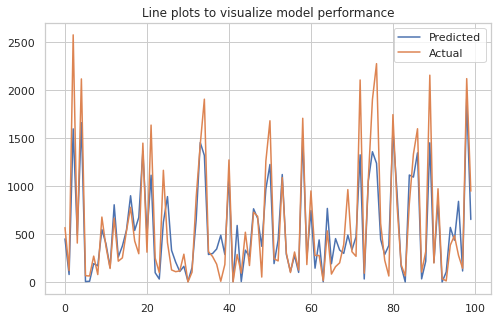

In [833]:
plt.figure(figsize=(8,5))
plt.plot((y_pred[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.title("Line plots to visualize model performance")
plt.legend(["Predicted","Actual"])
plt.show()

###Regularized Linear Regression

Regularization is used to avoid "Over-fitting" issue. Lets see few of the regularization techniques.


1.   L1 / Lasso Regression
2.   L2 / Ridge Regression

1.   Elastic Net Regression








####Lasso Regression

In [834]:
#Applying Lasso Regression to our train dataset
lasso = Lasso(alpha=0.001,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, max_iter=3000)

In [835]:
print("Score -",lasso.score(X_train, y_train))

Score - 0.7366618301844274


In [836]:
lasso.coef_

array([ 4.78587721, -3.27046527, -0.12877384,  1.25870005,  0.59816164,
        5.19703706,  1.23676792,  0.61895789,  1.22933175,  0.07757581,
       -0.        , -1.37136257,  0.        , -0.37122494, -0.92558942,
       -1.47089255, -1.93546797, -1.85426685, -0.91836721,  0.43800219,
        1.41698486,  0.03967778, -0.86095677, -0.87753929, -0.73800692,
       -0.82446635, -0.79903936, -0.50512676,  0.00638417,  0.73706317,
        1.87168769,  1.40998883,  1.17046754,  1.24835689,  1.04797841,
        0.32978413])

#####Lets do Hyperparamter tuning by applying GridSearchCV() for better selection of parameters. 

In [837]:
lasso = Lasso()
param= {'alpha':[1e-10,1e-5,1e-3,1e-1,1,5,10,20,30,50,100]}
lasso_reg = GridSearchCV(lasso,param,scoring='neg_mean_squared_error',cv=5)

In [838]:
lasso_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.1, 1, 5, 10, 20, 30,
                                   50, 100]},
             scoring='neg_mean_squared_error')

In [839]:
print("The best fit alpha value is found out to be :" ,lasso_reg.best_params_)
print("\nUsing ",lasso_reg.best_params_, " the negative mean squared error is: ", lasso_reg.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -41.1180545547108


In [840]:
# Predicted X_train and X_test values
pred_train = lasso_reg.predict(X_train)
y_pred_lasso = lasso_reg.predict(X_test)

In [841]:
train_eval,test_eval = eval_model(y_train,y_pred_train,y_test,y_pred_lasso,'Lasso Regression')

Train :- 
MSE : 122281.54226712306
RMSE : 349.6877782638722

Test :- 
MSE : 129353.08007191615
RMSE : 359.6568921512782

************************************************

Train :- 
R2 : 0.7023660593473617
Adjusted R2 :  0.7008276786060128

Test :- 
R2 : 0.7006399570244366
Adjusted R2 :  0.6943523481871435


In [842]:
train_eval

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,Lasso Regression,122281.542,349.688,0.702,0.701


In [843]:
test_eval

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,Lasso Regression,129353.08,359.657,0.701,0.694


In [844]:
evaluation_df_train = evaluation_df_train.append(train_eval)
evaluation_df = evaluation_df.append(test_eval)

####Ridge Regression

In [845]:
#Applying Ridge Regression to our train dataset
ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [846]:
print("Score - ",ridge.score(X_train, y_train))

Score -  0.7366621662449655


#####Let's do Hyperparameter tuning.

In [847]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-5,1e-3,1,3,5,7,9,10,20,30,40,50,70,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.001, 1, 3, 5, 7, 9, 10, 20, 30, 40,
                                   50, 70, 100]},
             scoring='neg_mean_squared_error')

In [848]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -41.23495084055198


In [849]:
#Model Prediction
y_pred_ridge_train = ridge_regressor.predict(X_train)
y_pred_ridge = ridge_regressor.predict(X_test)

In [850]:
train_eval,test_eval = eval_model(y_train,y_pred_ridge_train,y_test,y_pred_ridge,'Ridge Regression')

Train :- 
MSE : 122445.55419891152
RMSE : 349.9222116398322

Test :- 
MSE : 129502.28150346558
RMSE : 359.8642542730044

************************************************

Train :- 
R2 : 0.7019668534110675
Adjusted R2 :  0.7004264092937378

Test :- 
R2 : 0.700294662216336
Adjusted R2 :  0.6939998009793396


In [851]:
train_eval

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,Ridge Regression,122445.554,349.922,0.702,0.7


In [852]:
test_eval

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,Ridge Regression,129502.282,359.864,0.7,0.694


In [853]:
evaluation_df_train = evaluation_df_train.append(train_eval)
evaluation_df = evaluation_df.append(test_eval)

####Elastic Net Regression

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

In [854]:
#Applying Elastic Net Regression to our train dataset
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [855]:
print("Score - ",elasticnet.score(X_train, y_train))

Score -  0.7329517646896895


#####Let's do Hyperparameter tuning.

In [856]:
elastic = ElasticNet()
parameters = {'alpha': [1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,50,100],'l1_ratio':[0.1,0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10,
                                   20, 30, 40, 50, 100],
                         'l1_ratio': [0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [857]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.3}

Using  {'alpha': 0.001, 'l1_ratio': 0.3}  the negative mean squared error is:  -41.117748200700625


In [858]:
#Model Prediction
y_pred_elastic_train = elastic_regressor.predict(X_train)
y_pred_elastic = elastic_regressor.predict(X_test)

In [859]:
train_eval,test_eval = eval_model(y_train,y_pred_elastic_train,y_test,y_pred_elastic,'Elastic Net Regression')

Train :- 
MSE : 122331.08458078456
RMSE : 349.7586090159677

Test :- 
MSE : 129365.79438975785
RMSE : 359.6745673379727

************************************************

Train :- 
R2 : 0.7022454730857661
Adjusted R2 :  0.700706469070129

Test :- 
R2 : 0.7006105324546206
Adjusted R2 :  0.6943223055983583


In [860]:
train_eval

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,Elastic Net Regression,122331.085,349.759,0.702,0.701


In [861]:
test_eval

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,Elastic Net Regression,129365.794,359.675,0.701,0.694


In [862]:
evaluation_df_train = evaluation_df_train.append(train_eval)
evaluation_df = evaluation_df.append(test_eval)

Evaluation details of train dataset -

In [863]:
train_new = evaluation_df_train.reset_index(level=0)
train_new.drop('index',axis=1)

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,Linear Regression,122281.542,349.688,0.702,0.701
1,Lasso Regression,122281.542,349.688,0.702,0.701
2,Ridge Regression,122445.554,349.922,0.702,0.700
3,Elastic Net Regression,122331.085,349.759,0.702,0.701


Evaluation details of test dataset - 

In [864]:
test_new = evaluation_df.reset_index(level=0)
test_new.drop('index',axis=1)

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,Linear Regression,129299.908,359.583,0.701,0.694
1,Lasso Regression,129353.080,359.657,0.701,0.694
2,Ridge Regression,129502.282,359.864,0.700,0.694
3,Elastic Net Regression,129365.794,359.675,0.701,0.694


We can observe that both Linear regression and Regularized linear regression techniques gives almost same result. Now lets apply some tree based models.

###Random Forest Regressor

In [865]:
#Applying RandomForest Regression to our train dataset

rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [866]:
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [867]:
train_eval,test_eval = eval_model(y_train,y_pred_train_rf,y_test,y_pred_test_rf,'Random Forest Regression')

Train :- 
MSE : 5420.662096531264
RMSE : 73.6251458167063

Test :- 
MSE : 43532.4124093307
RMSE : 208.64422448112649

************************************************

Train :- 
R2 : 0.98680607889936
Adjusted R2 :  0.9867378834708427

Test :- 
R2 : 0.8992535404457174
Adjusted R2 :  0.8971375121236904


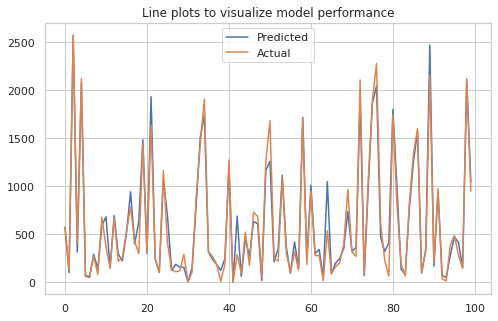

In [868]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_rf[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.title("Line plots to visualize model performance")
plt.legend(["Predicted","Actual"])
plt.show()

#####Let's do Hyperparameter tuning

In [869]:
# Number of trees
n_estimators = [100,150,200]

# Minimum number of samples required to split a node
min_samples_split = [20,30,50,100]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'min_samples_split' : min_samples_split}

In [870]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .............min_samples_split=20, n_estimators=100; total time=   2.0s
[CV] END .............min_samples_split=20, n_estimators=100; total time=   2.1s
[CV] END .............min_samples_split=20, n_estimators=100; total time=   2.1s
[CV] END .............min_samples_split=20, n_estimators=100; total time=   2.1s
[CV] END .............min_samples_split=20, n_estimators=100; total time=   2.0s
[CV] END .............min_samples_split=20, n_estimators=150; total time=   3.0s
[CV] END .............min_samples_split=20, n_estimators=150; total time=   3.1s
[CV] END .............min_samples_split=20, n_estimators=150; total time=   3.1s
[CV] END .............min_samples_split=20, n_estimators=150; total time=   3.1s
[CV] END .............min_samples_split=20, n_estimators=150; total time=   3.1s
[CV] END .............min_samples_split=20, n_estimators=200; total time=   4.0s
[CV] END .............min_samples_split=20, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [20, 30, 50, 100],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=2)

In [871]:
rf_grid.best_estimator_

RandomForestRegressor(min_samples_split=20)

In [872]:
rf_optimal_model = rf_grid.best_estimator_

In [873]:
rf_grid.best_params_

{'min_samples_split': 20, 'n_estimators': 100}

In [874]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


In [875]:
train_eval,test_eval = eval_model(y_train,train_class_preds,y_test,test_class_preds,'Random Forest Regression')

Train :- 
MSE : 23359.21672553219
RMSE : 152.8372229711473

Test :- 
MSE : 46633.20893363907
RMSE : 215.94723645751773

************************************************

Train :- 
R2 : 0.9431435391173634
Adjusted R2 :  0.942849665091265

Test :- 
R2 : 0.8920774099642526
Adjusted R2 :  0.8898106577814714


In [876]:
train_eval

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,Random Forest Regression,23359.217,152.837,0.943,0.943


In [877]:
test_eval

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,Random Forest Regression,46633.209,215.947,0.892,0.89


In [878]:
evaluation_df_train = evaluation_df_train.append(train_eval)
evaluation_df = evaluation_df.append(test_eval)

###Gradient Boosting Regressor

In [879]:
#Applying RandomForest Regression to our train dataset

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [880]:
y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)

In [881]:
train_eval,test_eval = eval_model(y_train,y_pred_train_gb,y_test,y_pred_test_gb,'Gradient Boosting Regression')

Train :- 
MSE : 70946.5615004315
RMSE : 266.3579574565616

Test :- 
MSE : 85316.68392090933
RMSE : 292.09019826229934

************************************************

Train :- 
R2 : 0.8273156824518927
Adjusted R2 :  0.8264231289082126

Test :- 
R2 : 0.8025527791769911
Adjusted R2 :  0.7984056963592383


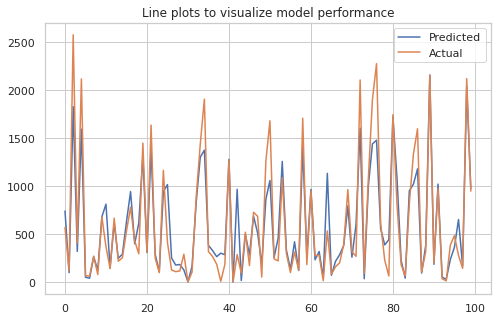

In [882]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_gb[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.title("Line plots to visualize model performance")
plt.legend(["Predicted","Actual"])
plt.show()

#####Let's do Hyperparameter tuning.

In [883]:
# Number of trees
n_estimators = [50,100,150]

# Maximum depth of trees
max_depth = [5,7,9]

# Minimum number of samples required to split a node
min_samples_split = [30,50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [30,50,70]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [884]:
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=30, n_estimators=50; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=30, n_estimators=50; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=30, n_estimators=50; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=30, n_estimators=50; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=30, n_estimators=50; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=30, n_estimators=100; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=30, n_estimators=100; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=30, n_estimators=100; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=30, n_estimators=100; total time=   1.1s
[CV] END max_depth=5, mi

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 7, 9],
                         'min_samples_leaf': [30, 50, 70],
                         'min_samples_split': [30, 50, 100, 150],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [885]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=9, min_samples_leaf=30,
                          min_samples_split=30, n_estimators=150)

In [886]:
gb_optimal_model = gb_grid.best_estimator_

In [887]:
gb_grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 30,
 'min_samples_split': 30,
 'n_estimators': 150}

In [888]:
# Making predictions on train and test data

y_pred_train_gb = gb_optimal_model.predict(X_train)
y_pred_gb = gb_optimal_model.predict(X_test)

In [889]:
train_eval,test_eval = eval_model(y_train,y_pred_train_gb,y_test,y_pred_gb,'Gradient Boosting Regression')

Train :- 
MSE : 17849.574049827228
RMSE : 133.60229807090604

Test :- 
MSE : 38227.7946515266
RMSE : 195.5192948318058

************************************************

Train :- 
R2 : 0.9565540394329037
Adjusted R2 :  0.9563294802684507

Test :- 
R2 : 0.9115299439071757
Adjusted R2 :  0.9096717630324139


In [890]:
train_eval

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,Gradient Boosting Regression,17849.574,133.602,0.957,0.956


In [891]:
test_eval

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,Gradient Boosting Regression,38227.795,195.519,0.912,0.91


In [892]:
evaluation_df_train = evaluation_df_train.append(train_eval)
evaluation_df = evaluation_df.append(test_eval)

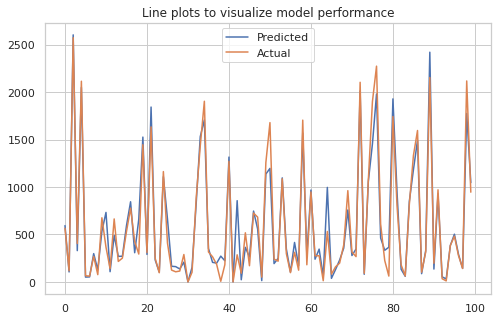

In [893]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_gb[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.title("Line plots to visualize model performance")
plt.legend(["Predicted","Actual"])
plt.show()

###XG Boost Regressor

In [894]:
#Applying XGBoost Regression to our train dataset

xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train,y_train)

[10:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [895]:
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

In [896]:
train_eval,test_eval = eval_model(y_train,y_pred_train_xgb,y_test,y_pred_test_xgb,'XG Boost Regression')

Train :- 
MSE : 70502.43131833975
RMSE : 265.52293934487045

Test :- 
MSE : 84716.5206547766
RMSE : 291.0610256540312

************************************************

Train :- 
R2 : 0.8283966977368487
Adjusted R2 :  0.8275097316375704

Test :- 
R2 : 0.8039417287175971
Adjusted R2 :  0.7998238187023308


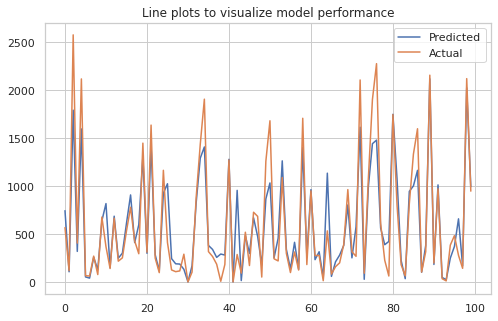

In [897]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_xgb[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.title("Line plots to visualize model performance")
plt.legend(["Predicted","Actual"])
plt.show()

#####Let's do Hyperparameter tuning

In [898]:
# Number of trees
n_estimators = [50,100,150]

# Maximum depth of trees
max_depth = [5,7,9]

# Minimum number of samples required to split a node
min_samples_split = [20,30,50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [20,30,50,70]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [899]:
# Create an instance of the GradientBoostingRegressor
xgb_model = xgb.XGBRegressor()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[10:46:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   0.5s
[10:46:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   0.5s
[10:46:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   0.5s
[10:46:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   0.5s
[10:46:19] WARNING: /work

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [5, 7, 9],
                         'min_samples_leaf': [20, 30, 50, 70],
                         'min_samples_split': [20, 30, 50, 100],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [900]:
xgb_grid.best_estimator_

XGBRegressor(max_depth=9, min_samples_leaf=20, min_samples_split=20,
             n_estimators=150)

In [901]:
xgb_optimal_model = xgb_grid.best_estimator_

In [902]:
xgb_grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 20,
 'min_samples_split': 20,
 'n_estimators': 150}

In [903]:
# Making predictions on train and test data

y_pred_train_xgb = xgb_optimal_model.predict(X_train)
y_pred_xgb= xgb_optimal_model.predict(X_test)

In [904]:
train_eval,test_eval = eval_model(y_train,y_pred_train_xgb,y_test,y_pred_xgb,'XG Boost Regression')

Train :- 
MSE : 5272.4628547137
RMSE : 72.6117267024666

Test :- 
MSE : 40597.38118836321
RMSE : 201.4879182193394

************************************************

Train :- 
R2 : 0.987166796662042
Adjusted R2 :  0.9871004656756577

Test :- 
R2 : 0.906046042579837
Adjusted R2 :  0.904072680580347


In [905]:
train_eval

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,XG Boost Regression,5272.463,72.612,0.987,0.987


In [906]:
test_eval

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,XG Boost Regression,40597.381,201.488,0.906,0.904


In [907]:
evaluation_df_train = evaluation_df_train.append(train_eval)
evaluation_df = evaluation_df.append(test_eval)

In [908]:
evaluation_df_train = evaluation_df_train.reset_index(level=0)
evaluation_df_train.drop('index',axis=1,inplace=True)

In [909]:
evaluation_df = evaluation_df.reset_index(level=0)
evaluation_df.drop('index',axis=1,inplace=True)

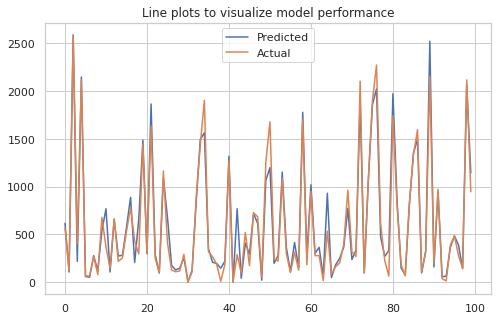

In [910]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_xgb[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.title("Line plots to visualize model performance")
plt.legend(["Predicted","Actual"])
plt.show()

#**Conclusion**

We initially started with exploring the dataset got familiarized with the features, done EDA on all the features of the dataset. Through analysis we came up with few conclusions like - 


*   People like to ride bikes mostly during warm temperature. i.e, around 25 degree celsius.
*   As the humidity rises above 70%, there is a steep decrease in the bike demand.

*   During Peak hours usuage of rental bikes is more.
*   Winter season(Dec-Feb) are the dull months for rental bike industry as the temperature falls lower degrees and people tend to stay indoors.


*   In weekdays, rental bike counts will be more during peak hours.
And in weekends, rental bike counts will keep on raising during evening times.
*   The amount of people using rental bikes will be less during holidays.










Then we cleaned and prepared our data for training models. 
<br>
First we started with Linear Regression and then we applied Regularized Linear regression (i.e, Lasso, Ridge and Elastic Net). Later we observed through evaluation that there is no improvement in model performance.
<br> 
There was no overfitting observed but still model is not being able to capture most of the data variance.

So, we applied some of the emsemble tree based techniques. They are Random Forest, Gradient Boost and XG Boost.
<br>
Among these 3 algorithms Gradient Boosting Regression performed well with an R2 score and Adjusted R2 score of 95% in training data and 91% in test data.

**Evaluation scores for training data**

In [911]:
evaluation_df_train

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,Linear Regression,122281.542,349.688,0.702,0.701
1,Lasso Regression,122281.542,349.688,0.702,0.701
2,Ridge Regression,122445.554,349.922,0.702,0.700
3,Elastic Net Regression,122331.085,349.759,0.702,0.701
4,Random Forest Regression,23359.217,152.837,0.943,0.943
5,Gradient Boosting Regression,17849.574,133.602,0.957,0.956
6,XG Boost Regression,5272.463,72.612,0.987,0.987


**Evaluation scores for testing data**

In [912]:
evaluation_df

,Model,MSE,RMSE,R2_Score,Adjusted_R2
0,Linear Regression,129299.908,359.583,0.701,0.694
1,Lasso Regression,129353.080,359.657,0.701,0.694
2,Ridge Regression,129502.282,359.864,0.700,0.694
3,Elastic Net Regression,129365.794,359.675,0.701,0.694
4,Random Forest Regression,46633.209,215.947,0.892,0.890
5,Gradient Boosting Regression,38227.795,195.519,0.912,0.910
6,XG Boost Regression,40597.381,201.488,0.906,0.904


From the above evaluation scores we conclude that Gradient Boost algorithm gives the best predictions for the given data.

So lets, visualize its performance and observe feature importance .

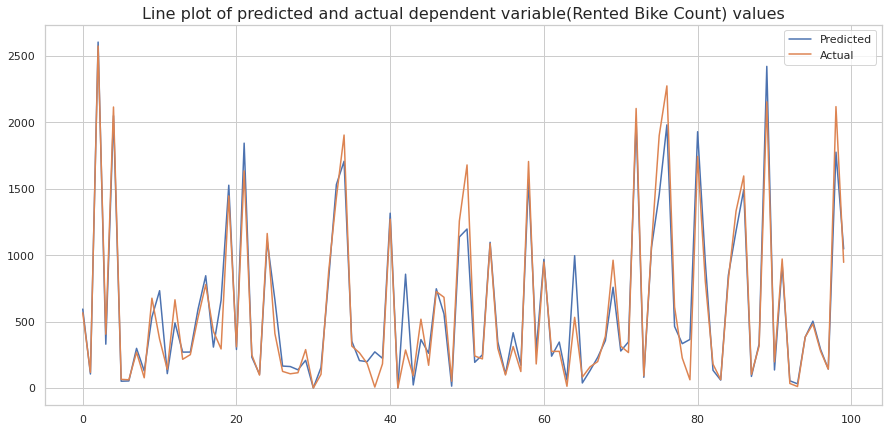

In [913]:
plt.figure(figsize=(15,7))
plt.plot((y_pred_gb[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.title("Line plot of predicted and actual dependent variable(Rented Bike Count) values", fontsize=16)
plt.show()

**Feature Importance**

In [914]:
features = X_train.columns
importances = gb_optimal_model.feature_importances_
indices = np.argsort(importances[:10])

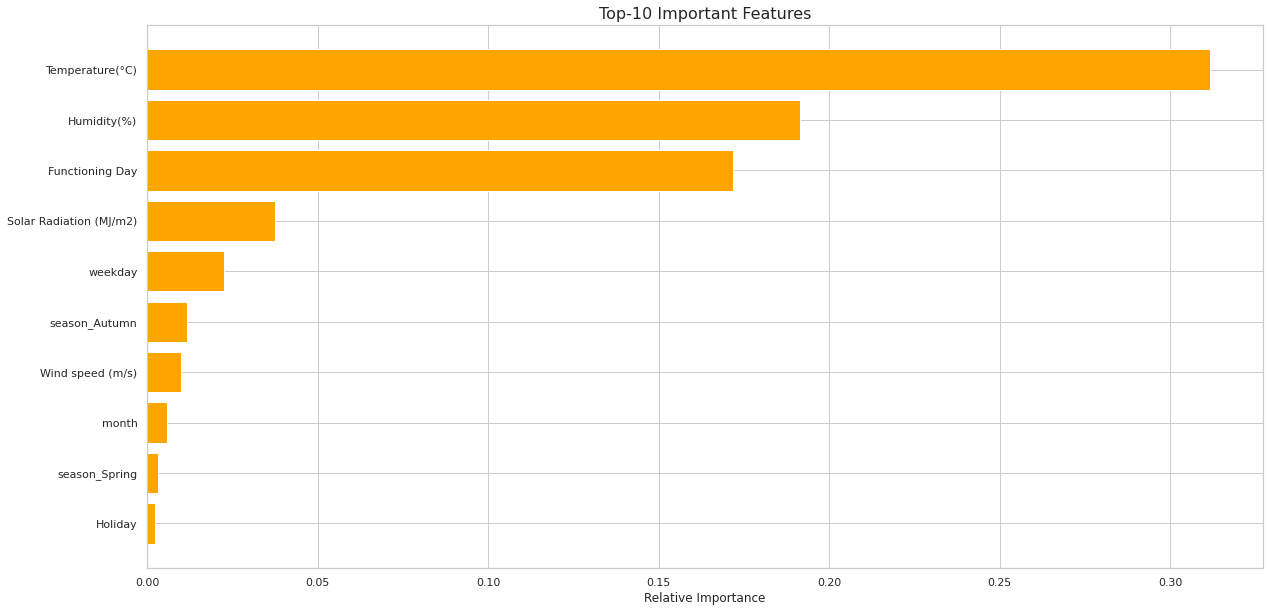

In [915]:
#Plot the figure
plt.figure(figsize=(20,10))
plt.title('Top-10 Important Features', fontsize=16)
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

From the above chart we can conclude that **"Temperature"** plays major role in deciding the number of rental bikes.